<a href="https://colab.research.google.com/github/ritwikraha/CV-Practice/blob/master/LLava_quantized_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LLava for Image Understanding

LLaVa is a cutting-edge chatbot that's open-source and built by enhancing the LlamA/Vicuna model using data generated by GPT, specifically for following multimodal instructions. Essentially, it's a version of large language models (LLMs) that's been specially adapted to handle chat and instruction-based tasks. This innovative model was first introduced in the study "Visual Instruction Tuning" and further refined in "Improved Baselines with Visual Instruction Tuning," thanks to the efforts of researchers Haotian Liu, Chunyuan Li, Yuheng Li, and Yong Jae Lee. It stands out for its ability to process and respond to a variety of inputs, making it a versatile tool in the realm of chatbots.



This notebook is heavily inspired from both the [HuggingFace Documentation for LLava](https://huggingface.co/docs/transformers/model_doc/llava) and their [official Notebook for LLava](https://colab.research.google.com/drive/1qsl6cd2c8gGtEW1xV5io7S8NHh-Cp1TV?usp=sharing#scrollTo=_FNZ3rVNQP6A) that uses quantization config to load the model in 4bit precision.



In [1]:
!pip install -qq git+https://github.com/huggingface/transformers.git@main

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [2]:
!pip install -q bitsandbytes==0.41.3 accelerate==0.25.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 33.3 MB/s eta 0:00:00


In [13]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import requests
from transformers import AutoProcessor, LlavaForConditionalGeneration

In [4]:
url = "https://i.imgur.com/iWjdvXK.jpg"
image = Image.open(requests.get(url, stream=True).raw)


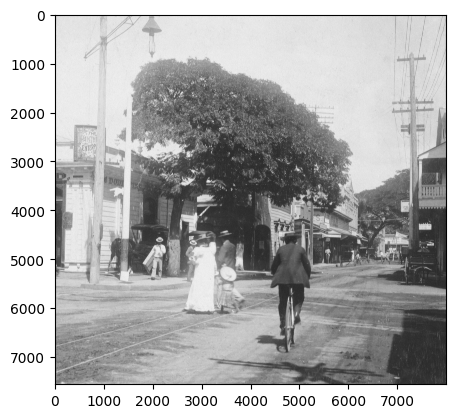

In [15]:
plt.imshow(image)

## Understanding `class transformers.LlavaConfig`

This is the configuration class to store the configuration of a LlavaForConditionalGeneration. It is used to instantiate an Llava model according to the specified arguments, defining the model architecture. Instantiating a configuration with the defaults will yield a similar configuration to that of the Llava-9B.

e.g. llava-hf/llava-9b

Configuration objects inherit from PretrainedConfig and can be used to control the model outputs. Read the documentation from PretrainedConfig for more information.

In [22]:
from transformers import LlavaForConditionalGeneration, LlavaConfig, CLIPVisionConfig, LlamaConfig

# Initializing a CLIP-vision config
vision_config = CLIPVisionConfig()

# Initializing a Llama config
text_config = LlamaConfig()

# Initializing a Llava llava-1.5-7b style configuration
configuration = LlavaConfig(vision_config, text_config)

# Initializing a model from the llava-1.5-7b style configuration
model = LlavaForConditionalGeneration(configuration)

# Accessing the model configuration
configuration = model.config

In [23]:
print(configuration)

LlavaConfig {
  "ignore_index": -100,
  "image_token_index": 32000,
  "model_type": "llava",
  "projector_hidden_act": "gelu",
  "text_config": {
    "model_type": "llama"
  },
  "transformers_version": "4.38.0.dev0",
  "vision_config": {
    "hidden_size": 768,
    "image_size": 224,
    "intermediate_size": 3072,
    "model_type": "clip_vision_model",
    "num_attention_heads": 12,
    "num_hidden_layers": 12,
    "patch_size": 32,
    "projection_dim": 512
  },
  "vision_feature_layer": -2,
  "vision_feature_select_strategy": "default",
  "vocab_size": 32000
}



In [9]:
import torch
from transformers import BitsAndBytesConfig

quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16
)

In [10]:
from transformers import pipeline

model_id = "llava-hf/llava-1.5-7b-hf"

pipe = pipeline("image-to-text", model=model_id, model_kwargs={"quantization_config": quantization_config})

config.json:   0%|          | 0.00/954 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/70.1k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.18G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.33k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/41.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/438 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


preprocessor_config.json:   0%|          | 0.00/557 [00:00<?, ?B/s]

In [11]:
max_new_tokens = 200
prompt = "USER: <image>\nWhat is happening in this image?\nASSISTANT:"

outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 200})

In [12]:
print(outputs[0]["generated_text"])

USER:  
What is happening in this image?
ASSISTANT: In the image, a man is riding a bicycle down a street, passing by a group of people walking on the sidewalk. The scene appears to be set in a small town, with the man on the bicycle and the pedestrians walking together. The man on the bicycle is wearing a suit, which adds a touch of formality to the scene. The overall atmosphere of the image suggests a sense of community and shared experiences among the people in the town.


In [16]:
text = outputs[0]["generated_text"]

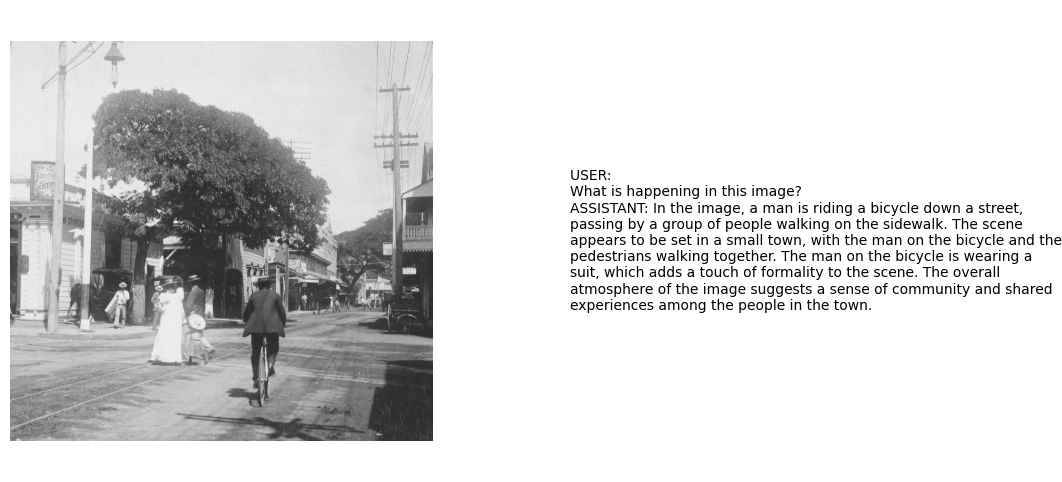

In [20]:
# Create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Display the image in the first subplot
ax1.imshow(image)
ax1.axis('off')  # Turn off axis

# Display the text in the second subplot
ax2.text(0.125, 0.5, text, ha='left', va='center', wrap=True)
ax2.axis('off')  # Turn off axis

plt.show()